<a href="https://colab.research.google.com/github/NeonLabs146/General_stuffs/blob/main/Wine_review_Text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
df = pd.read_csv("wine_reviews.csv", usecols = ['country','description','points','price','variety','winery'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   variety      129970 non-null  object 
 5   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.9+ MB


In [ ]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


1. Data cleaning
2. EDA
3. Text prepration
4. Model Building
5. Evaluation
6. Improvement
7. Deploy

In [ ]:
df = df.dropna(subset=['description','points','price'])

In [ ]:
df.head()

,country,description,points,price,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Tempranillo-Merlot,Tandem


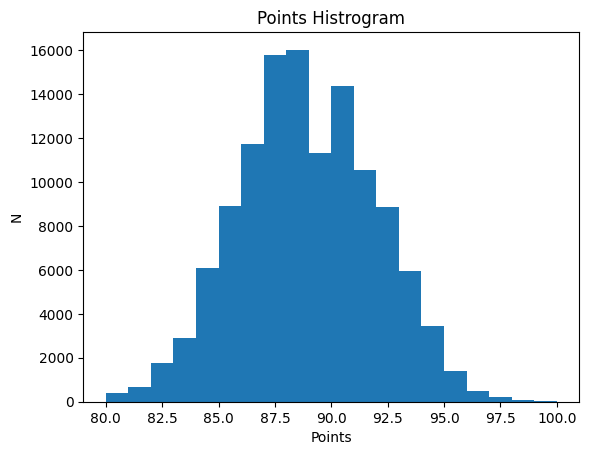

In [ ]:
plt.hist(df.points,bins=20)
plt.title('Points Histrogram')
plt.ylabel('N')
plt.xlabel('Points')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])

In [ ]:
df.head()

,country,description,points,price,variety,winery
1,30,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,39,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,39,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,39,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
5,36,Blackberry and raspberry aromas show a typical...,87,15.0,Tempranillo-Merlot,Tandem


In [ ]:
#check missing values
df.isnull().sum()

country        0
description    0
points         0
price          0
variety        1
winery         0
dtype: int64

In [ ]:
#check duplicates
df.duplicated().sum()

9384

In [ ]:
#Remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
#drop last two columns
df.drop(['winery','variety'],axis=1,inplace=True)

In [ ]:
df.head()

,country,description,points,price
1,30,"This is ripe and fruity, a wine that is smooth...",87,15.0
2,39,"Tart and snappy, the flavors of lime flesh and...",87,14.0
3,39,"Pineapple rind, lemon pith and orange blossom ...",87,13.0
4,39,"Much like the regular bottling from 2012, this...",87,65.0
5,36,Blackberry and raspberry aromas show a typical...,87,15.0


2. EDA

In [ ]:
df.value_counts('country')

country
39    50237
14    16286
21    15505
36     6049
30     4502
8      4130
0      3501
3      2536
2      2169
16     1951
28     1240
35     1195
20      453
17      427
7       224
6       132
18      128
31      102
41       98
38       81
15       74
34       70
25       68
10       68
13       59
26       56
42       55
5        44
22       32
27       24
29       16
40       14
24       11
12       11
11       10
19        8
32        8
37        6
23        5
4         2
1         2
9         1
33        1
Name: count, dtype: int64

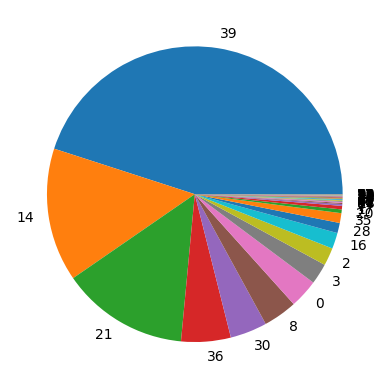

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df.value_counts('country'),labels=df.value_counts('country').index)
plt.show()

In [ ]:
#data is imblanced
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters']=df['description'].apply(len)

In [ ]:
df.head()

,country,description,points,price,num_characters,num_words
1,30,"This is ripe and fruity, a wine that is smooth...",87,15.0,227,44
2,39,"Tart and snappy, the flavors of lime flesh and...",87,14.0,186,33
3,39,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,199,38
4,39,"Much like the regular bottling from 2012, this...",87,65.0,249,50
5,36,Blackberry and raspberry aromas show a typical...,87,15.0,261,51


In [ ]:
#num of words
df['num_words']=df['description'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,country,description,points,price,num_characters,num_words
1,30,"This is ripe and fruity, a wine that is smooth...",87,15.0,227,44
2,39,"Tart and snappy, the flavors of lime flesh and...",87,14.0,186,33
3,39,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,199,38
4,39,"Much like the regular bottling from 2012, this...",87,65.0,249,50
5,36,Blackberry and raspberry aromas show a typical...,87,15.0,261,51


In [ ]:
df['description'].apply(lambda x:nltk.sent_tokenize(x))

1         [This is ripe and fruity, a wine that is smoot...
2         [Tart and snappy, the flavors of lime flesh an...
3         [Pineapple rind, lemon pith and orange blossom...
4         [Much like the regular bottling from 2012, thi...
5         [Blackberry and raspberry aromas show a typica...
                                ...                        
129966    [Notes of honeysuckle and cantaloupe sweeten t...
129967    [Citation is given as much as a decade of bott...
129968    [Well-drained gravel soil gives this wine its ...
129969    [A dry style of Pinot Gris, this is crisp with...
129970    [Big, rich and off-dry, this is powered by int...
Name: description, Length: 111591, dtype: object

In [ ]:
df['num_sentences']=df['description'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,country,description,points,price,num_characters,num_words,num_sentences
1,30,"This is ripe and fruity, a wine that is smooth...",87,15.0,227,44,3
2,39,"Tart and snappy, the flavors of lime flesh and...",87,14.0,186,33,3
3,39,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,199,38,2
4,39,"Much like the regular bottling from 2012, this...",87,65.0,249,50,2
5,36,Blackberry and raspberry aromas show a typical...,87,15.0,261,51,3


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,111591.000000,111591.000000,111591.000000
mean,244.473721,47.567053,2.733303
std,67.184123,13.091405,0.863244
min,20.000000,4.000000,1.000000
25%,198.000000,39.000000,2.000000
50%,239.000000,46.000000,3.000000
75%,285.000000,55.000000,3.000000
max,829.000000,156.000000,11.000000


In [ ]:
df[df['country']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3501.000000,3501.000000,3501.000000
mean,250.760640,49.737789,3.112539
std,54.793001,11.190114,0.794204
min,62.000000,13.000000,1.000000
25%,214.000000,42.000000,3.000000
50%,247.000000,49.000000,3.000000
75%,285.000000,57.000000,4.000000
max,479.000000,101.000000,7.000000


In [ ]:
df[df['country']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2.000000,2.000000,2.000000
mean,214.500000,43.000000,2.500000
std,0.707107,2.828427,0.707107
min,214.000000,41.000000,2.000000
25%,214.250000,42.000000,2.250000
50%,214.500000,43.000000,2.500000
75%,214.750000,44.000000,2.750000
max,215.000000,45.000000,3.000000


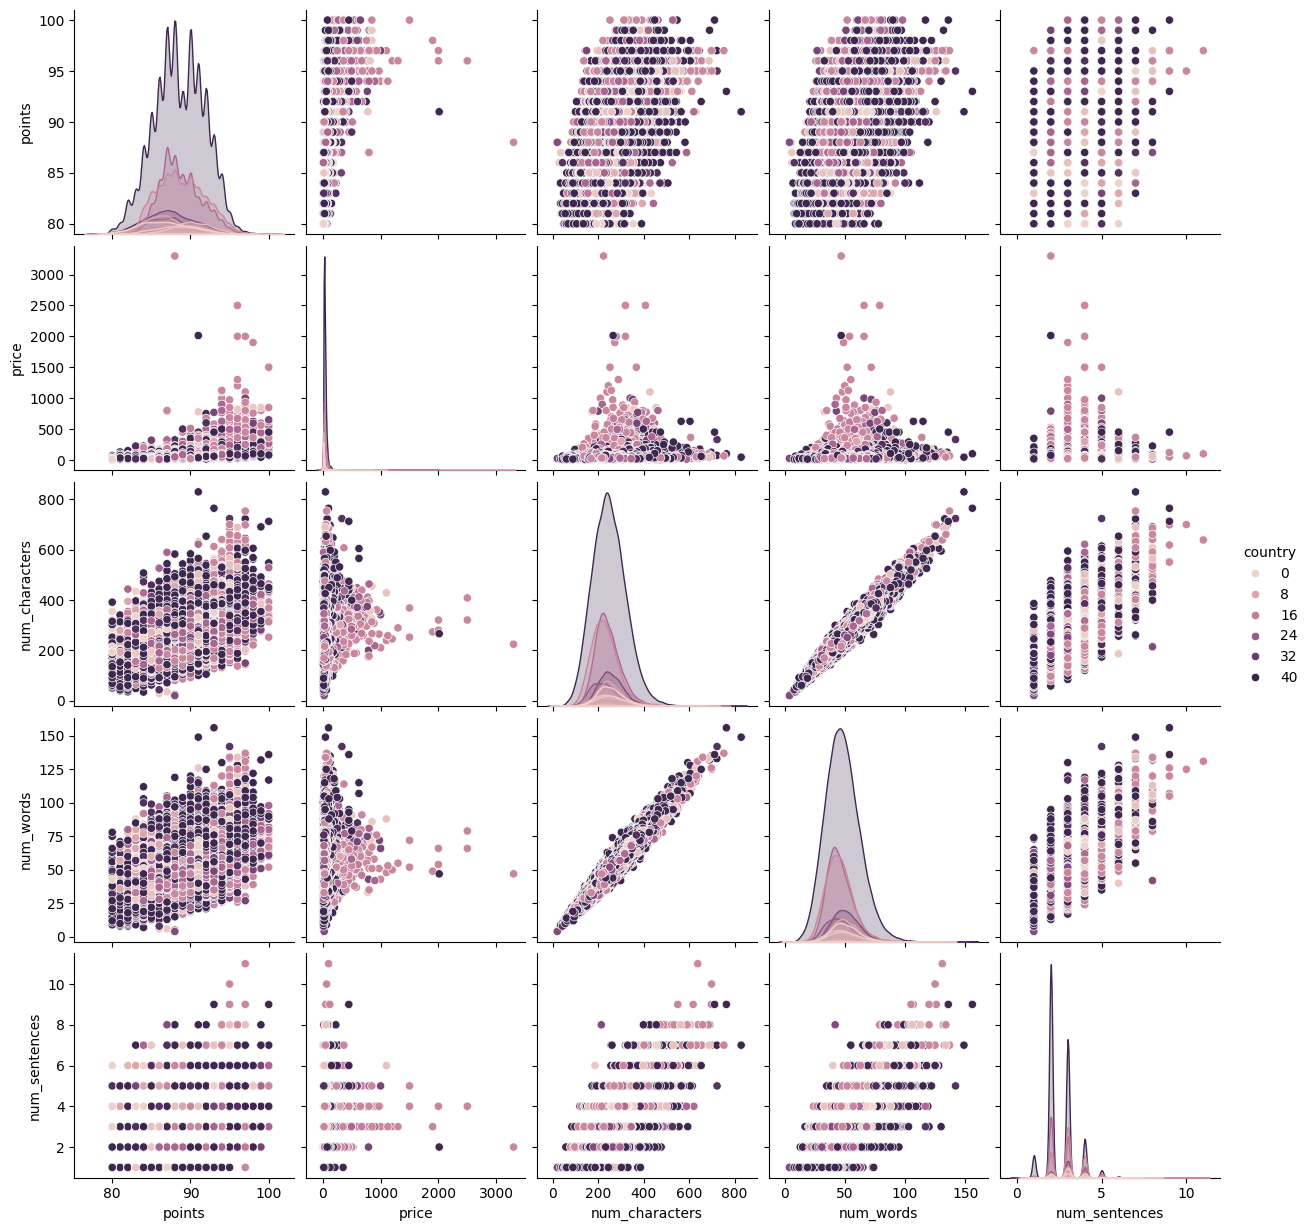

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='country')
#sns.pairplot(df[['num_characters','num_words','num_sentences','points','country']])

<Axes: xlabel='num_characters', ylabel='Count'>

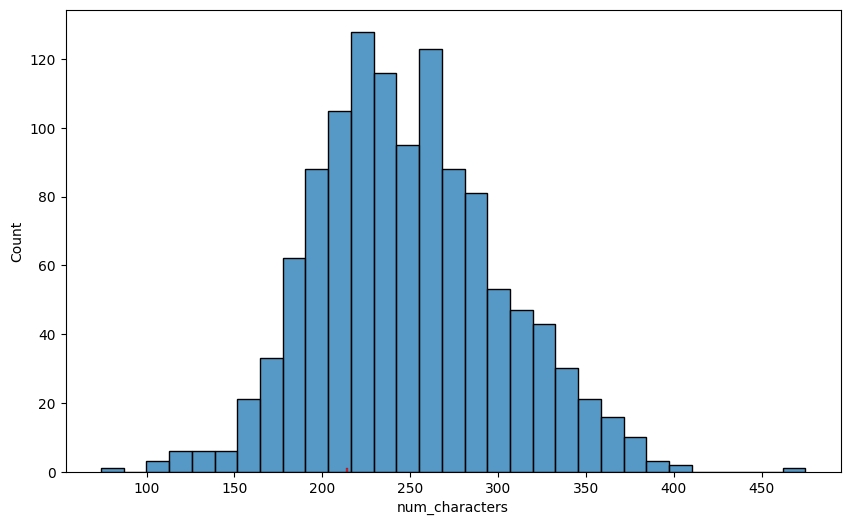

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['country']==0]['num_characters'])
sns.histplot(df[df['country']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

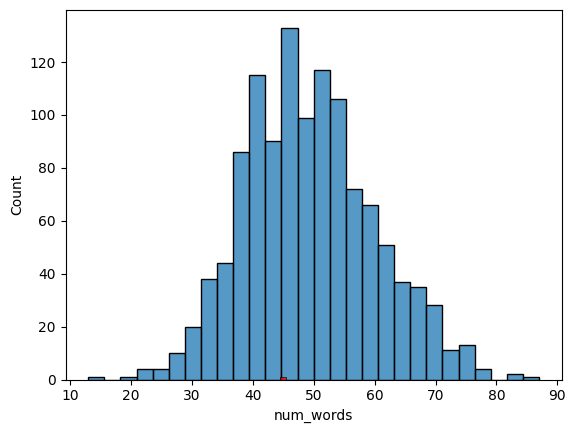

In [ ]:
sns.histplot(df[df['country']==0]['num_words'])
sns.histplot(df[df['country']==1]['num_words'],color='red')

<Axes: >

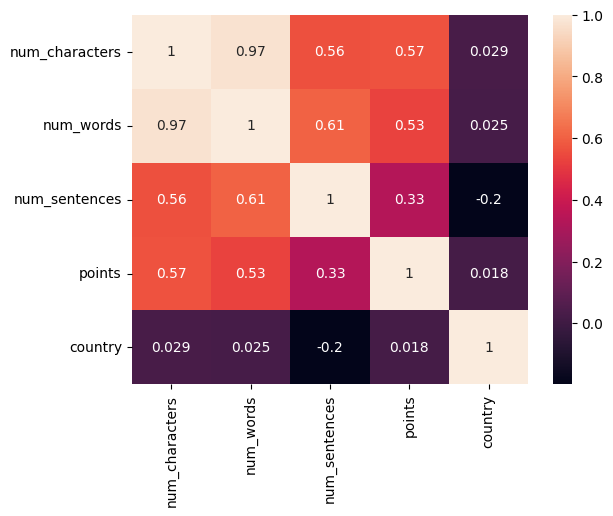

In [ ]:
sns.heatmap(df[['num_characters','num_words','num_sentences','points','country']].corr(),annot=True)

#**Data Preprocessing**
1. Lower case
2. Tokenization
3. Removing Special Characters
4. Removing Stop words and Punctuations
5. Stemming

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
def transform_text(text_string):
  text_string = text_string.lower()
  text_string = nltk.word_tokenize(text_string)

  u=[]
  for i in text_string:
    if i.isalnum():
      u.append(i)
  text = u[:]
  u.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      u.append(i)
  text = u[:]
  u.clear()

  for i in text:
    u.append(ps.stem(i))
  return " ".join(u)

In [ ]:
df['description'][10]

'Soft, supple plum envelopes an oaky structure in this Cabernet, supported by 15% Merlot. Coffee and chocolate complete the picture, finishing strong at the end, resulting in a value-priced wine of attractive flavor and immediate accessibility.'

In [ ]:
transform_text(df['description'][10])

'soft suppl plum envelop oaki structur cabernet support 15 merlot coffe chocol complet pictur finish strong end result wine attract flavor immedi access'

In [ ]:
df['description_trans'] = df['description'].apply(transform_text)

In [ ]:
df.head()

,country,description,points,price,num_characters,num_words,num_sentences,description_trans
1,30,"This is ripe and fruity, a wine that is smooth...",87,15.0,227,44,3,ripe fruiti wine smooth still structur firm ta...
2,39,"Tart and snappy, the flavors of lime flesh and...",87,14.0,186,33,3,tart snappi flavor lime flesh rind domin green...
3,39,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,199,38,2,pineappl rind lemon pith orang blossom start a...
4,39,"Much like the regular bottling from 2012, this...",87,65.0,249,50,2,much like regular bottl 2012 come across rathe...
5,36,Blackberry and raspberry aromas show a typical...,87,15.0,261,51,3,blackberri raspberri aroma show typic navarran...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

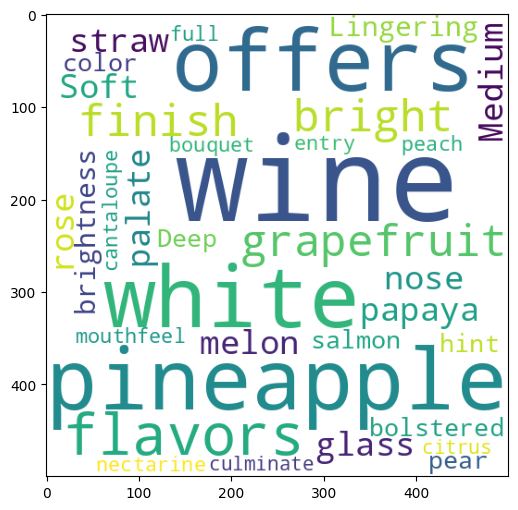

In [ ]:
wine_in = wc.generate(df[df['country']==1]['description'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(wine_in)

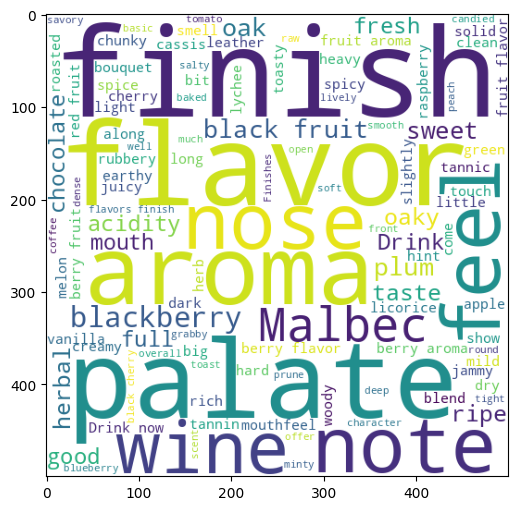

In [ ]:
wine_out = wc.generate(df[df['country']==0]['description'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(wine_out)

In [ ]:
for review in df[df['country']==1]['description'].tolist():
  for word in nltk.word_tokenize(review):
    if word in wine_in.words_:
      wine_in.words_[word] += 1
    else:
      wine_in.words_[word] = 1

In [ ]:
from collections import Counter
Counter(wine_in.words_).most_common(10)

[(',', 6),
 ('of', 5),
 ('and', 5),
 ('.', 5),
 ('a', 4),
 ('finish', 3.0),
 ('in', 3),
 ('the', 3),
 ('on', 3),
 ('wine', 2.3383641674780913)]

In [ ]:
for review in df[df['country']==1]['description'].tolist():
  for word in nltk.word_tokenize(review):
    if word in wine_out.words_:
      wine_out.words_[word] += 1
    else:
      wine_out.words_[word] = 1

In [ ]:
from collections import Counter
Counter(wine_out.words_).most_common(10)

[(',', 12),
 ('of', 10),
 ('and', 10),
 ('.', 10),
 ('a', 8),
 ('in', 6),
 ('the', 6),
 ('on', 6),
 ('finish', 5.0),
 ('wine', 4.338364167478091)]

#**Model-Naive based**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(df['description_trans']).toarray()

NameError: name 'df' is not defined

In [ ]:
X.shape

(111591, 21196)

In [ ]:
y=df['country'].values

In [ ]:
y

array([30, 39, 39, ..., 14, 14, 14])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

NameError: name 'X' is not defined

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnf = gnb.fit(X_train,y_train)
mnb = mnb.fit(X_train,y_train)
bnb = bnb.fit(X_train,y_train)

In [ ]:
y_pred1 = gnb.predict(X_test)
y_pred2 = mnb.predict(X_test)
y_pred3 = bnb.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred1))
#print(accuracy_score(y_test,y_pred2))
#print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred1))
#print(confusion_matrix(y_test,y_pred2))
#print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test, y_pred1, average='micro'))

0.5566844919786096
[[ 120    3    2 ...   30    0    0]
 [   4   24    1 ...   45    0    0]
 [   1    0   68 ...   16    0    0]
 ...
 [  95   82   20 ... 2107    1    0]
 [   4    0    0 ...    4    0    0]
 [   1    0    0 ...    2    0    0]]
0.5566844919786096


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = tfidf.fit_transform(df['description_trans']).toarray()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X.shape

(37397, 5000)

In [ ]:
y=df['country'].values
y

array([29, 38, 38, ..., 13, 13, 38])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnbf = gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test, y_pred1, average='micro'))

0.5566844919786096
[[ 120    3    2 ...   30    0    0]
 [   4   24    1 ...   45    0    0]
 [   1    0   68 ...   16    0    0]
 ...
 [  95   82   20 ... 2107    1    0]
 [   4    0    0 ...    4    0    0]
 [   1    0    0 ...    2    0    0]]
0.5566844919786096


###**Improving the model**

In [ ]:
#tfidf --> MNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test, y_pred1, average='micro')
  return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.7213114754098361
Precision -  0.5758196721311475
For  KN
Accuracy -  0.6372950819672131
Precision -  0.5758196721311475
For  NB
Accuracy -  0.5266393442622951
Precision -  0.5758196721311475
For  DT
Accuracy -  0.5450819672131147
Precision -  0.5758196721311475
For  LR
Accuracy -  0.6495901639344263
Precision -  0.5758196721311475
For  RF
Accuracy -  0.6352459016393442
Precision -  0.5758196721311475
For  AdaBoost
Accuracy -  0.45081967213114754
Precision -  0.5758196721311475
For  BgC
Accuracy -  0.6045081967213115
Precision -  0.5758196721311475
For  ETC
Accuracy -  0.6659836065573771
Precision -  0.5758196721311475
For  GBDT
Accuracy -  0.6147540983606558
Precision -  0.5758196721311475
For  xgb
Accuracy -  0.6618852459016393
Precision -  0.5758196721311475


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.721311,0.57582
1,KN,0.637295,0.57582
2,NB,0.526639,0.57582
3,DT,0.545082,0.57582
4,LR,0.649590,0.57582
5,RF,0.635246,0.57582
6,AdaBoost,0.450820,0.57582
7,BgC,0.604508,0.57582
8,ETC,0.665984,0.57582
9,GBDT,0.614754,0.57582


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.721311
1,KN,Accuracy,0.637295
2,NB,Accuracy,0.526639
3,DT,Accuracy,0.545082
4,LR,Accuracy,0.649590
5,RF,Accuracy,0.635246
6,AdaBoost,Accuracy,0.450820
7,BgC,Accuracy,0.604508
8,ETC,Accuracy,0.665984
9,GBDT,Accuracy,0.614754


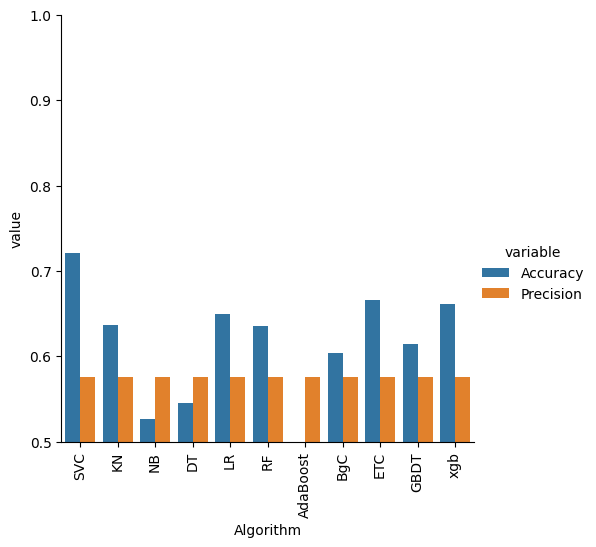

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#modl improvement
#change the max_features parameter of TfIdf
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_5000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
new_df_scaled

**Feed Forward-NN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

In [ ]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [ ]:
X.shape,y.shape


((768, 8), (768,))

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y,(-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

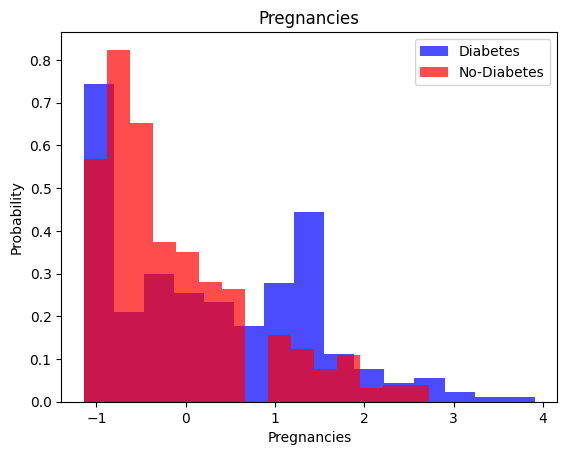

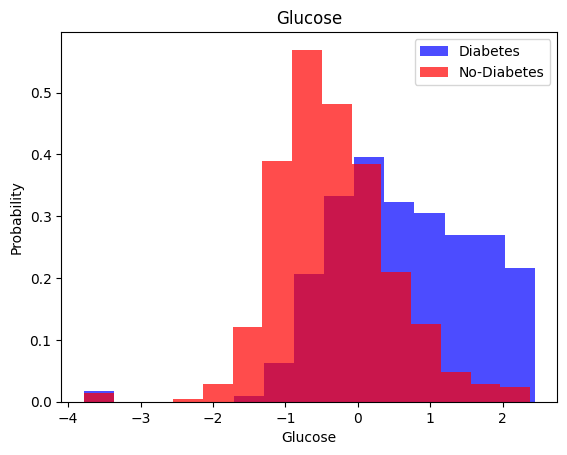

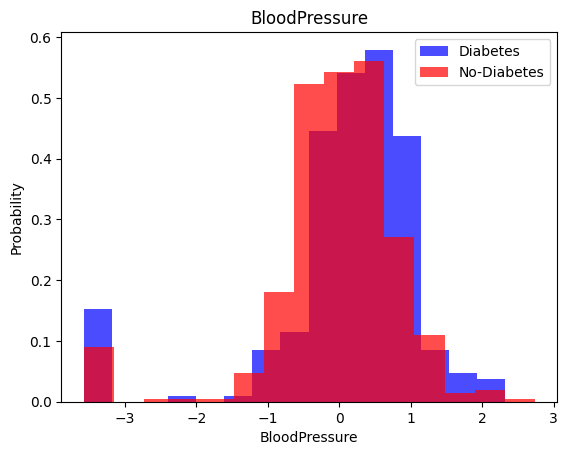

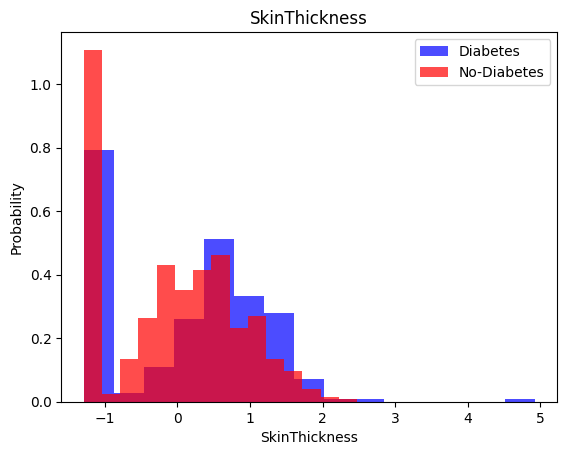

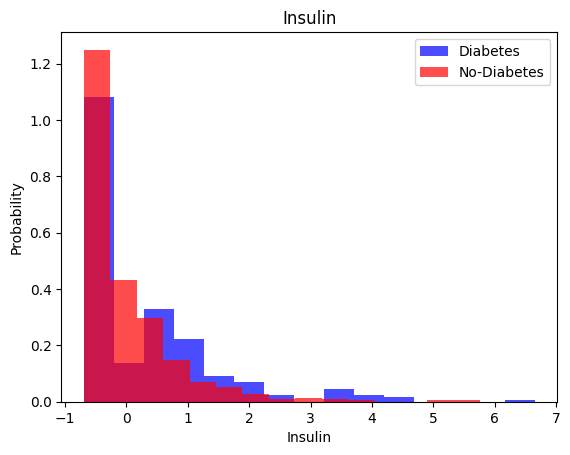

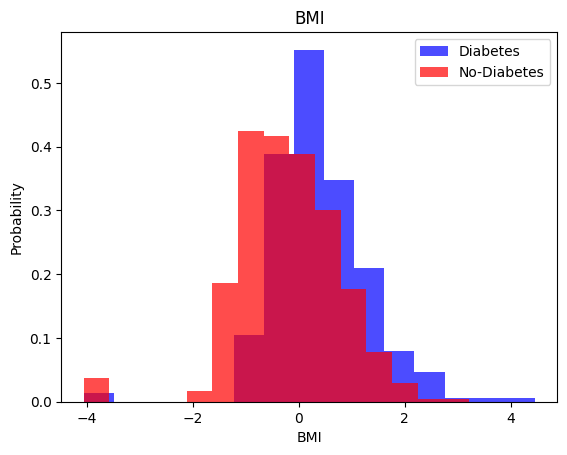

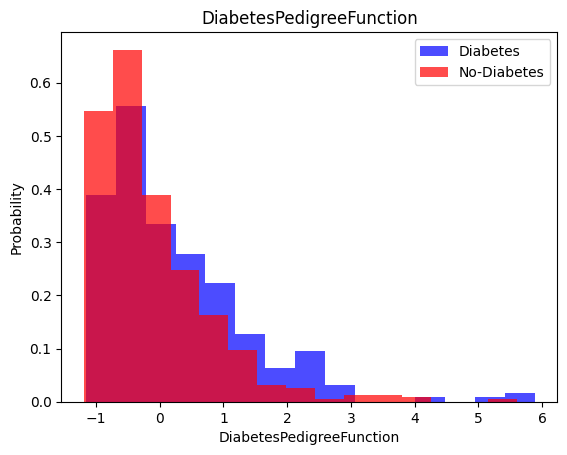

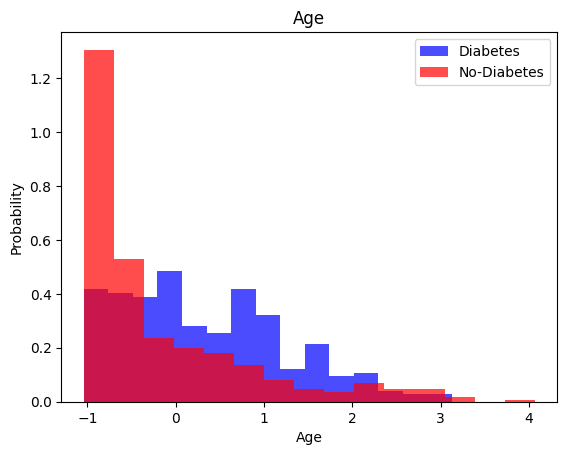

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label],color='blue',label='Diabetes',alpha=0.7,density=True,bins=15)
  plt.hist(transformed_df[transformed_df ['Outcome']==0][label],color='red',label='No-Diabetes',alpha=0.7, density=True,bins=15)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
len(transformed_df[transformed_df["Outcome"]==1]),len(transformed_df[transformed_df["Outcome"]==0])

(268, 500)

The True value and Flase value are not in same ratio, True is almost half of Flase, So we nee to oversample the train data.

In [ ]:
over =RandomOverSampler()
X,y = over.fit_resample(X,y)
data = np.hstack((X, np.reshape(y,(-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [ ]:
len(transformed_df[transformed_df["Outcome"]==1]),len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


In [ ]:
model.evaluate(X_train,y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5100


[0.6979713439941406, 0.5099999904632568]

In [ ]:
model.evaluate(X_valid,y_valid)

7/7 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5350


[0.6907389163970947, 0.5350000262260437]

In [ ]:
model.fit(X_train,y_train,batch_size=16, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.6797 - accuracy: 0.5583 - val_loss: 0.6530 - val_accuracy: 0.6250
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6417 - accuracy: 0.6617 - val_loss: 0.6246 - val_accuracy: 0.6700
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.6118 - accuracy: 0.6900 - val_loss: 0.5965 - val_accuracy: 0.6850
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.7200 - val_loss: 0.5715 - val_accuracy: 0.7100
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5585 - accuracy: 0.7200 - val_loss: 0.5476 - val_accuracy: 0.7300
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7267 - val_loss: 0.5295 - val_accuracy: 0.7200
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7317 - val_loss: 0.5100 - val_accuracy: 0.7300
Epoch 8/20
38/38 [==

In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7850


[0.4736919403076172, 0.7850000262260437]

FCC-MAGIC-classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsyn','fMlong','fM3Trans','fAlpha','fNnist','class']
df = pd.read_csv('magic04.data', names = cols)

In [ ]:
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsyn,fMlong,fM3Trans,fAlpha,fNnist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df['class']=(df['class']=='g').astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsyn,fMlong,fM3Trans,fAlpha,fNnist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


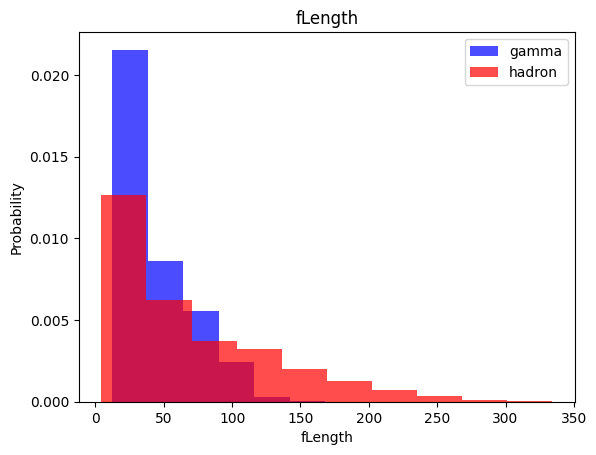

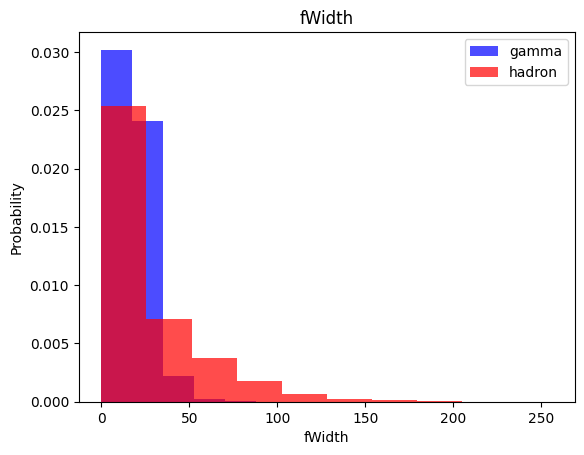

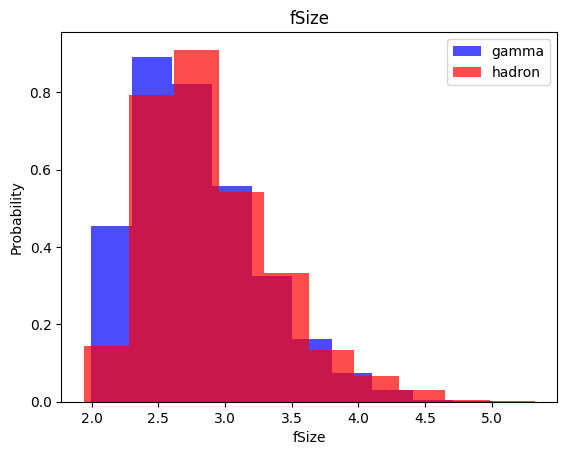

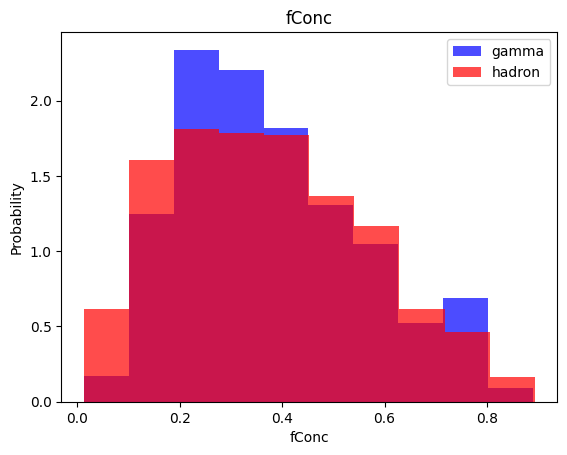

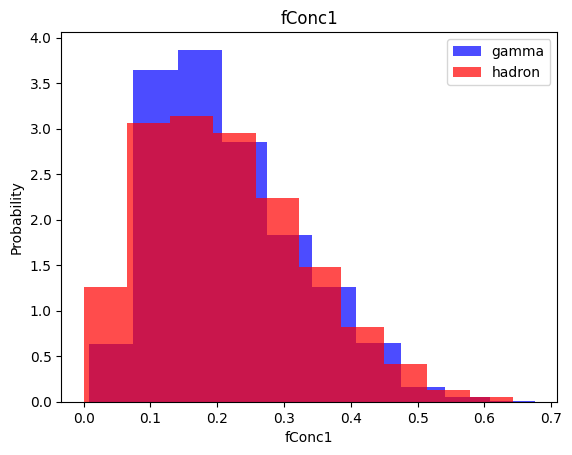

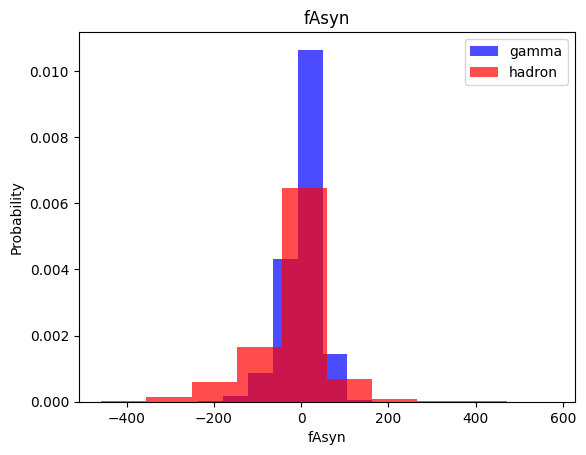

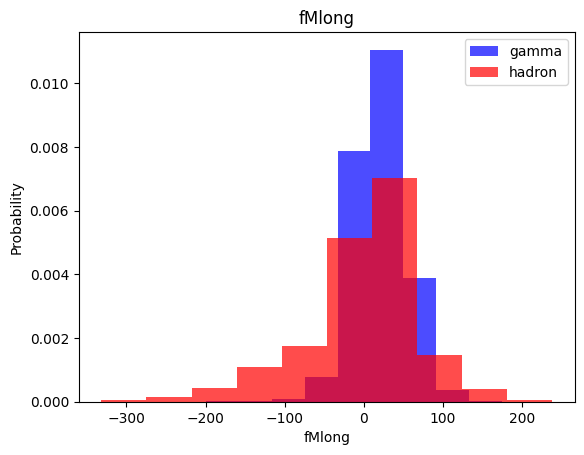

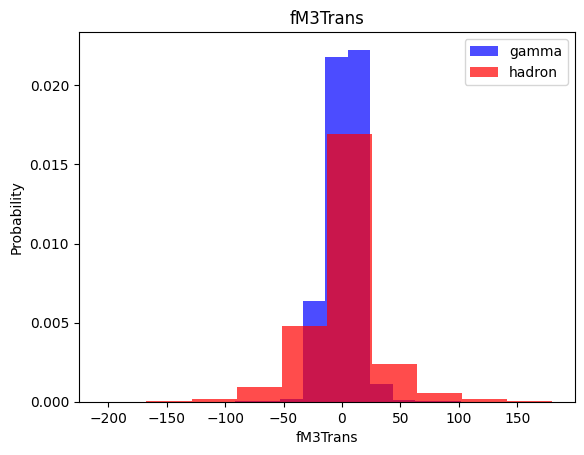

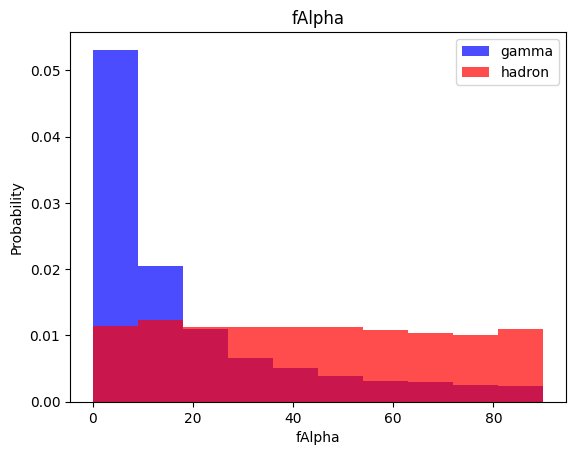

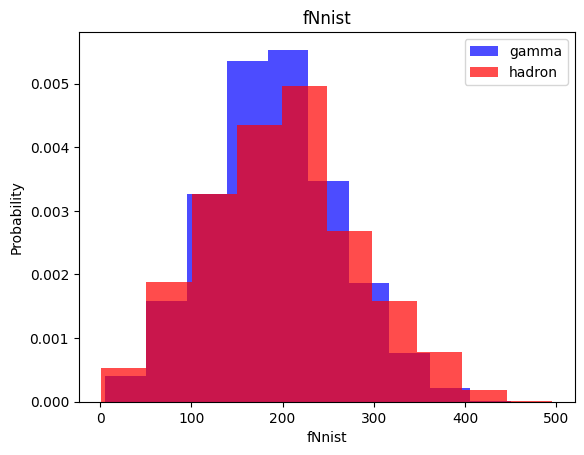

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma',alpha=0.7,density=True)
  plt.hist(df[df['class']==0][label], color='red', label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

##**Train, Test and Validation**

In [ ]:
train,valid,test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])